# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
  
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{base_url}&appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_clouds =city_weather["clouds"]["all"]
        city_humidity = city_weather["main"]["humidity"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | araouane
Processing Record 2 of Set 1 | le port
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | tuggurt
City not found. Skipping...
Processing Record 6 of Set 1 | krasnyy yar
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | okhotsk
Processing Record 10 of Set 1 | lima
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | gujranwala
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | rairangpur
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 

Processing Record 35 of Set 4 | voh
Processing Record 36 of Set 4 | santa fe
Processing Record 37 of Set 4 | agropoli
Processing Record 38 of Set 4 | byron bay
Processing Record 39 of Set 4 | kavieng
Processing Record 40 of Set 4 | mitsamiouli
Processing Record 41 of Set 4 | macae
Processing Record 42 of Set 4 | hasaki
Processing Record 43 of Set 4 | kostrzyn
Processing Record 44 of Set 4 | providencia
Processing Record 45 of Set 4 | fredericksburg
Processing Record 46 of Set 4 | wonosobo
Processing Record 47 of Set 4 | kiunga
Processing Record 48 of Set 4 | simbahan
Processing Record 49 of Set 4 | koumac
Processing Record 0 of Set 5 | aswan
Processing Record 1 of Set 5 | storsteinnes
Processing Record 2 of Set 5 | narasannapeta
Processing Record 3 of Set 5 | saint-leu
Processing Record 4 of Set 5 | ribeira grande
Processing Record 5 of Set 5 | caete
Processing Record 6 of Set 5 | namtsy
Processing Record 7 of Set 5 | san cristobal
Processing Record 8 of Set 5 | tambura
Processing Reco

Processing Record 22 of Set 8 | le mars
Processing Record 23 of Set 8 | hami
Processing Record 24 of Set 8 | katsuura
Processing Record 25 of Set 8 | alofi
Processing Record 26 of Set 8 | lolua
City not found. Skipping...
Processing Record 27 of Set 8 | mao
Processing Record 28 of Set 8 | boa vista
Processing Record 29 of Set 8 | preili
Processing Record 30 of Set 8 | vemalwada
Processing Record 31 of Set 8 | gizo
Processing Record 32 of Set 8 | necochea
Processing Record 33 of Set 8 | jishou
Processing Record 34 of Set 8 | college
Processing Record 35 of Set 8 | iaciara
Processing Record 36 of Set 8 | talant
Processing Record 37 of Set 8 | chik
Processing Record 38 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 39 of Set 8 | porto seguro
Processing Record 40 of Set 8 | barcelona
Processing Record 41 of Set 8 | balaipungut
Processing Record 42 of Set 8 | kuche
City not found. Skipping...
Processing Record 43 of Set 8 | shypyntsi
Processing Record 44 of Set 8 | a

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame( city_data, columns=("City","Lat","Lng", "Max Temp","Humidity","Cloudiness","Wind Speed", "Country", "Date"))

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,21.00,75,100,6.39,ZA,[dt]
1,charters towers,-20.1000,146.2667,23.29,90,36,3.29,AU,[dt]
2,coihaique,-45.5752,-72.0662,22.97,46,40,4.12,CL,[dt]
3,fortuna,40.5982,-124.1573,10.52,91,0,2.06,US,[dt]
4,atuona,-9.8000,-139.0333,25.84,77,14,7.39,PF,[dt]


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,21.00,75,100,6.39,ZA,['dt']
1,charters towers,-20.1000,146.2667,23.29,90,36,3.29,AU,['dt']
2,coihaique,-45.5752,-72.0662,22.97,46,40,4.12,CL,['dt']
3,fortuna,40.5982,-124.1573,10.52,91,0,2.06,US,['dt']
4,atuona,-9.8000,-139.0333,25.84,77,14,7.39,PF,['dt']


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

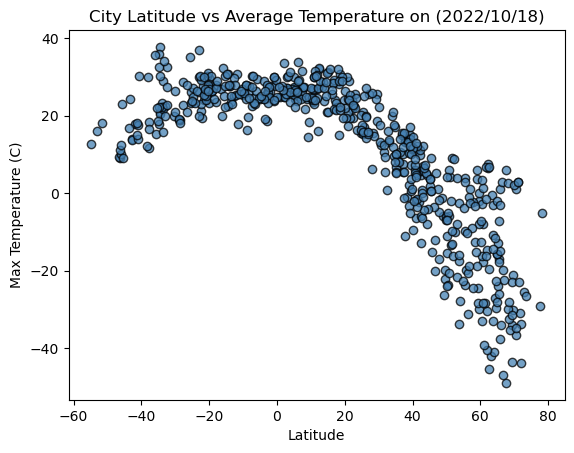

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Average Temperature on (2022/10/18)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

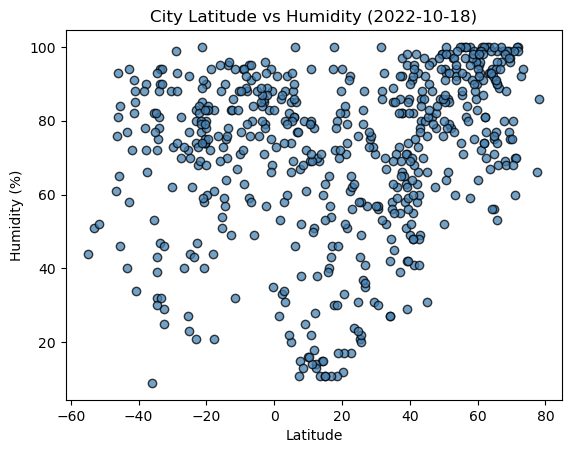

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2022-10-18)")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

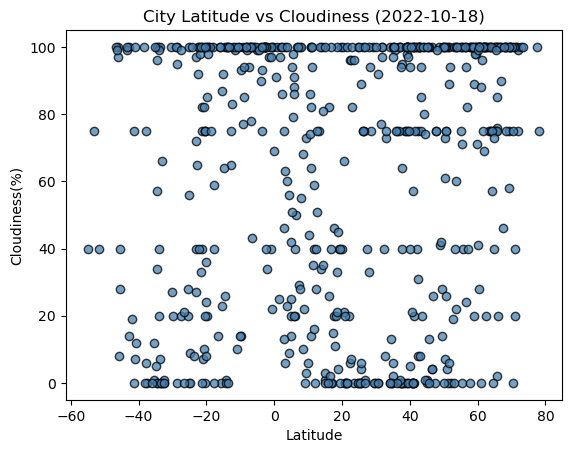

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs Cloudiness (2022-10-18)")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

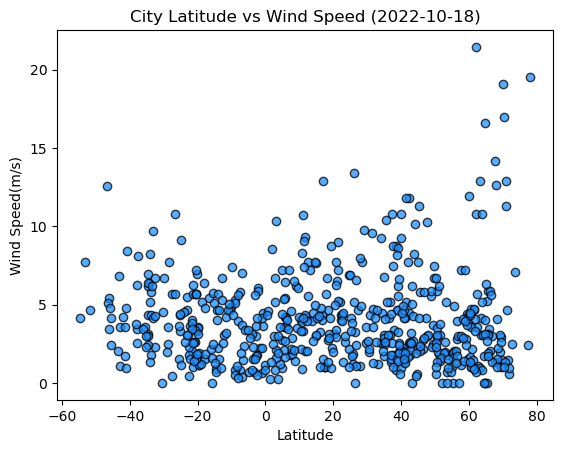

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="dodgerblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude vs Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0] 
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,fortuna,40.5982,-124.1573,10.52,91,0,2.06,US,['dt']
5,gat,31.6100,34.7642,10.60,100,77,9.56,IL,['dt']
6,tosya,41.0155,34.0401,-6.44,82,100,2.25,TR,['dt']
11,severo-kurilsk,50.6789,156.1250,-5.93,64,75,5.87,RU,['dt']
12,bethel,41.3712,-73.4140,5.30,41,0,5.14,US,['dt']


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

#rthern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) > 0, :]
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

#southern_hemi_df=city_data_df[city_data_df["Lat"]<0] 

# Display sample data southern_hemi_df.head()
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,21.00,75,100,6.39,ZA,['dt']
1,charters towers,-20.1000,146.2667,23.29,90,36,3.29,AU,['dt']
2,coihaique,-45.5752,-72.0662,22.97,46,40,4.12,CL,['dt']
4,atuona,-9.8000,-139.0333,25.84,77,14,7.39,PF,['dt']
7,ushuaia,-54.8000,-68.3000,12.81,44,40,4.12,AR,['dt']


###  Temperature vs. Latitude Linear Regression Plot

 The r value is: 0.76


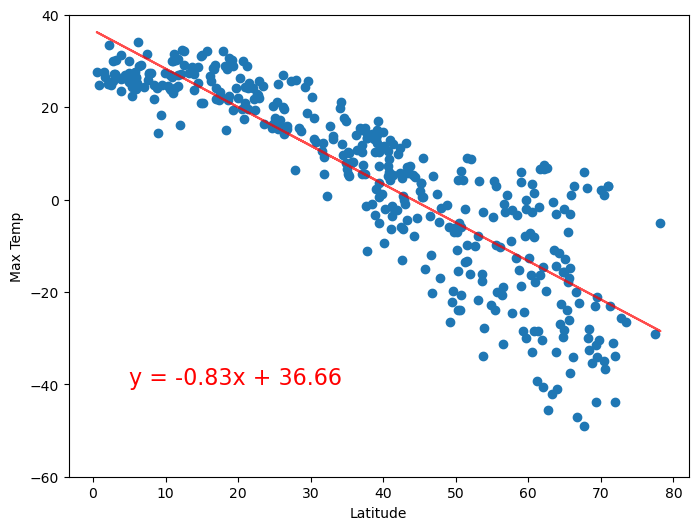

In [55]:
# Define a function to create Linear Regression plots
#def linear_reg(x_values, y_values):

x_values = pd.to_numeric(northern_hemi_df['Lat'])
y_values = pd.to_numeric(northern_hemi_df['Max Temp'])

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f" The r value is: {r_squared}")
#y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize = (8,6))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value

plt.ylim(ymin=-60, ymax=40)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.70)
plt.annotate(line_eq,(5,-40),fontsize=16,color="red")

# Define title and x/y labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()
#linear_reg("pd.to_numeric(northern_hemi_df['Lat'])", "pd.to_numeric(northern_hemi_df['Max Temp])" )

 The r value is: 0.21


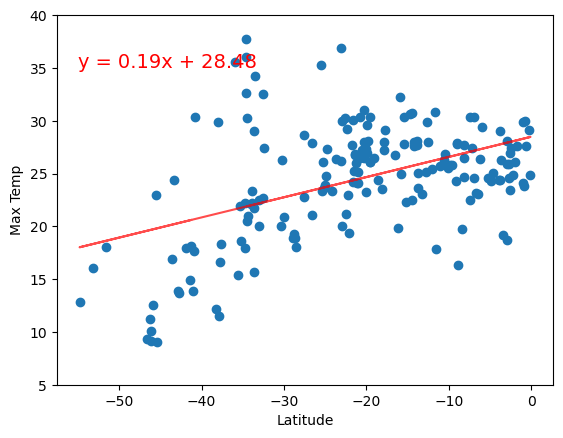

In [56]:
# Linear regression on Southern Hemisphere

x_values = pd.to_numeric(southern_hemi_df['Lat'])
y_values = pd.to_numeric(southern_hemi_df['Max Temp'])
correlation = round(st.pearsonr(x_values, y_values)[0],2)
# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f" The r value is: {r_squared}")
#y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.ylim(ymin=5,ymax=40)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)
plt.annotate(line_eq,(-55,35),fontsize=14,color="red")

# Define title and x/y labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

**Discussion about the linear relationship:** The final linear regression and scatter plot map of maximum temprature and latitude shows temperature decreases progressively from equator towards the north poles. In the southern hemispher the graph shows temprature increases progressively from southern pole towards equator. Thus the realtionship between the two variables in the southern hemispher is a weak positive relationship while there is strong negative relashinship in the northen hemispher.


### Humidity vs. Latitude Linear Regression Plot

 The r value is: 0.2537551222943923


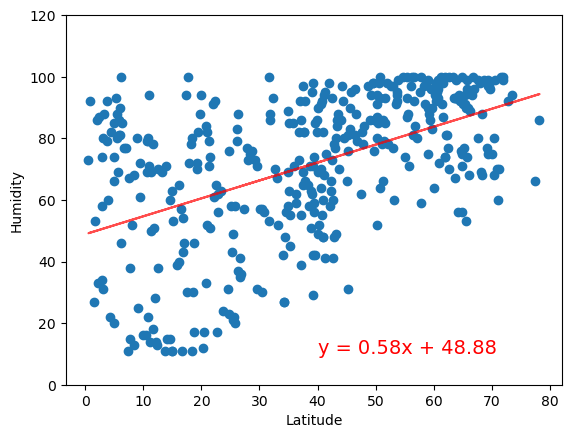

In [74]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat'])
y_values = pd.to_numeric(northern_hemi_df['Humidity'])
correlation = round(st.pearsonr(x_values, y_values)[0],2)
# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = (rvalue**2)
print(f" The r value is: {r_squared}")
#y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.ylim(ymin=0, ymax=120)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)
plt.annotate(line_eq,(40,10),fontsize=14,color="red")

# Define title and x/y labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

 The r value is: 0.059417800248114924


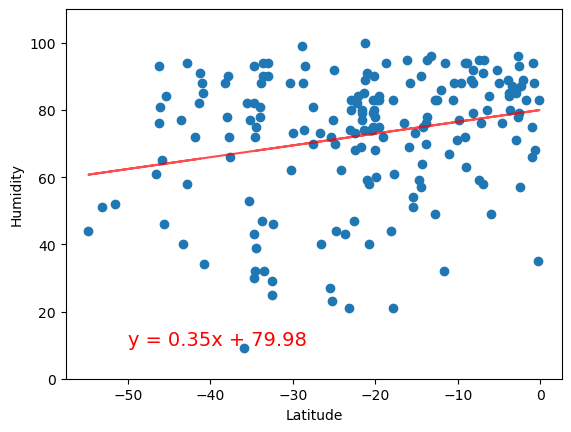

In [79]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat'])
y_values = pd.to_numeric(southern_hemi_df['Humidity'])
correlation = (st.pearsonr(x_values, y_values)[0])
# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = (rvalue**2)
print(f" The r value is: {r_squared}")
#y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.ylim(ymin=0,ymax=110)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)
plt.annotate(line_eq,(-50,10),fontsize=14,color="red")
# Define title and x/y labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

**Discussion about the linear relationship:** The the realtionship between the two variables of latitude and humidity in both southern and northern hemispher is a very weak relationship. Thus there is no defined pattern between the two variables.

### Cloudiness vs. Latitude Linear Regression Plot

 The r value is: 0.06806846792879889


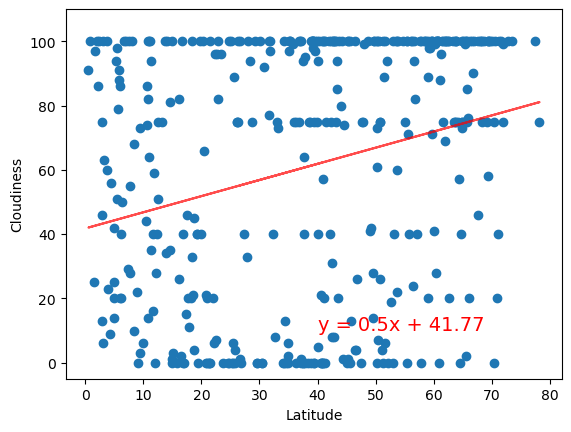

In [102]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat'])
y_values = pd.to_numeric(northern_hemi_df['Cloudiness'])
correlation = round(st.pearsonr(x_values, y_values)[0],2)
# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = (rvalue**2)
print(f" The r value is: {r_squared}")
#y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.ylim(ymin=-5, ymax=110)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)
plt.annotate(line_eq,(40,10),fontsize=14,color="red")

# Define title and x/y labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

 The r value is: 0.11457013835570073


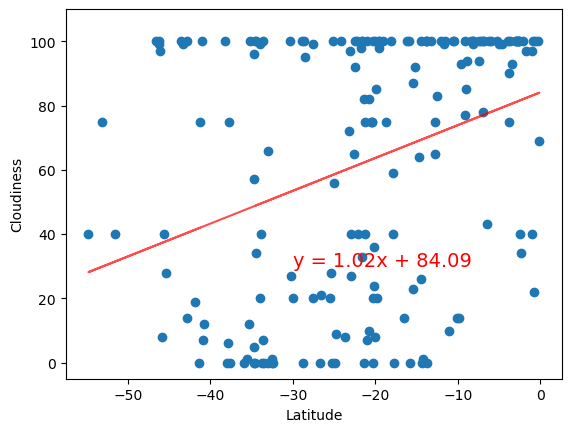

In [101]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat'])
y_values = pd.to_numeric(southern_hemi_df['Cloudiness'])
correlation = round(st.pearsonr(x_values, y_values)[0],2)
# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = (rvalue**2)
print(f" The r value is: {r_squared}")
#y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.ylim(ymin=-5, ymax=110)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)
plt.annotate(line_eq,(-30,30),fontsize=14,color="red")

# Define title and x/y labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

**Discussion about the linear relationship:** The the realtionship between the two variables of latitude and cloudness in both southern and northern hemispher is a very weak relationship. Thus there is no defined pattern between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

 The r value is: 2.4217226632428165e-05


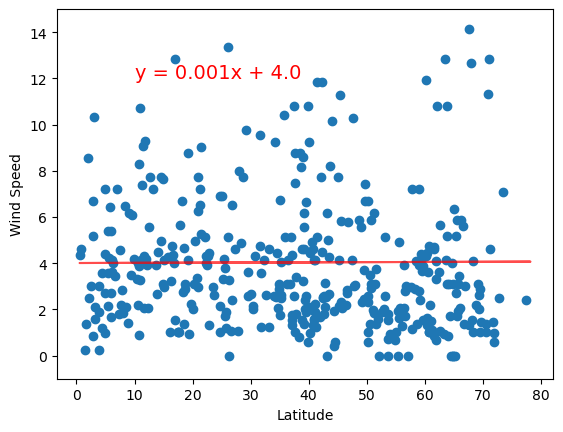

In [95]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat'])
y_values = pd.to_numeric(northern_hemi_df['Wind Speed'])
correlation = round(st.pearsonr(x_values, y_values)[0],2)
# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = (rvalue**2)
print(f" The r value is: {r_squared}")
#y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,1))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.ylim(ymin=-1, ymax=15)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)
plt.annotate(line_eq,(10,12),fontsize=14,color="red")

# Define title and x/y labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

 The r value is: 0.0837389642437861


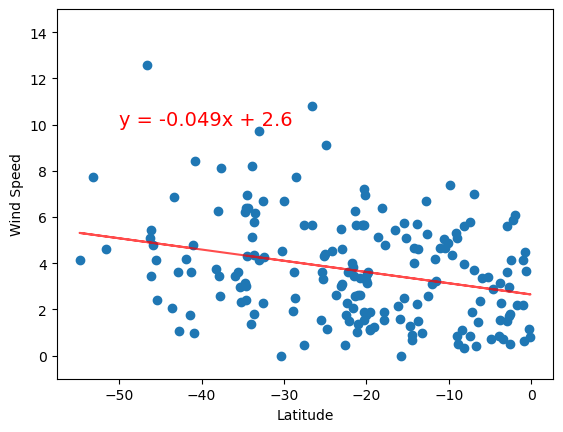

In [99]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat'])
y_values = pd.to_numeric(southern_hemi_df['Wind Speed'])
correlation = round(st.pearsonr(x_values, y_values)[0],2)
# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = (rvalue**2)
print(f" The r value is: {r_squared}")
#y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,1))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.ylim(ymin=-1, ymax=15)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)
plt.annotate(line_eq,(-50,10),fontsize=14,color="red")

# Define title and x/y labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

The the realtionship between the two variables of latitude and wind speed in both southern and northern hemispher is a very weak relationship while it is worsen in northen hemispher. Thus there is no defined pattern between th two variables.